In [4]:
import pandas as pd
df=pd.read_csv("machine_format.csv")

In [2]:
df.head()

,Vendor Name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor Name  209 non-null    object
 1   Model Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [4]:
df.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [5]:
df.isnull().sum().sum()

0

In [6]:
for col in df.columns:
    if df[col].isnull().values.any():
        print(col, df[col].isnull().sum())
    else:
        print(col,"No Null values")

Vendor Name No Null values
Model Name No Null values
MYCT No Null values
MMIN No Null values
MMAX No Null values
CACH No Null values
CHMIN No Null values
CHMAX No Null values
PRP No Null values
ERP No Null values


In [7]:
for column in df.columns:
    print(column,df[column].nunique())

Vendor Name 30
Model Name 209
MYCT 60
MMIN 25
MMAX 23
CACH 22
CHMIN 15
CHMAX 31
PRP 116
ERP 104


In [8]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['GLD']))]
categorical_features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Vendor Name and number of categories are 30
The feature is Model Name and number of categories are 209


In [11]:
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

9


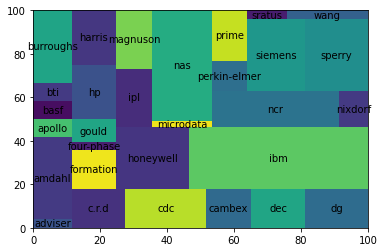

In [40]:
Vendors=df['Vendor Name'].value_counts()
names=df['Vendor Name'].unique()
value=[]
for i in names:
    value.append(Vendors[i])
squarify.plot(sizes=value, label=names)
plt.show()

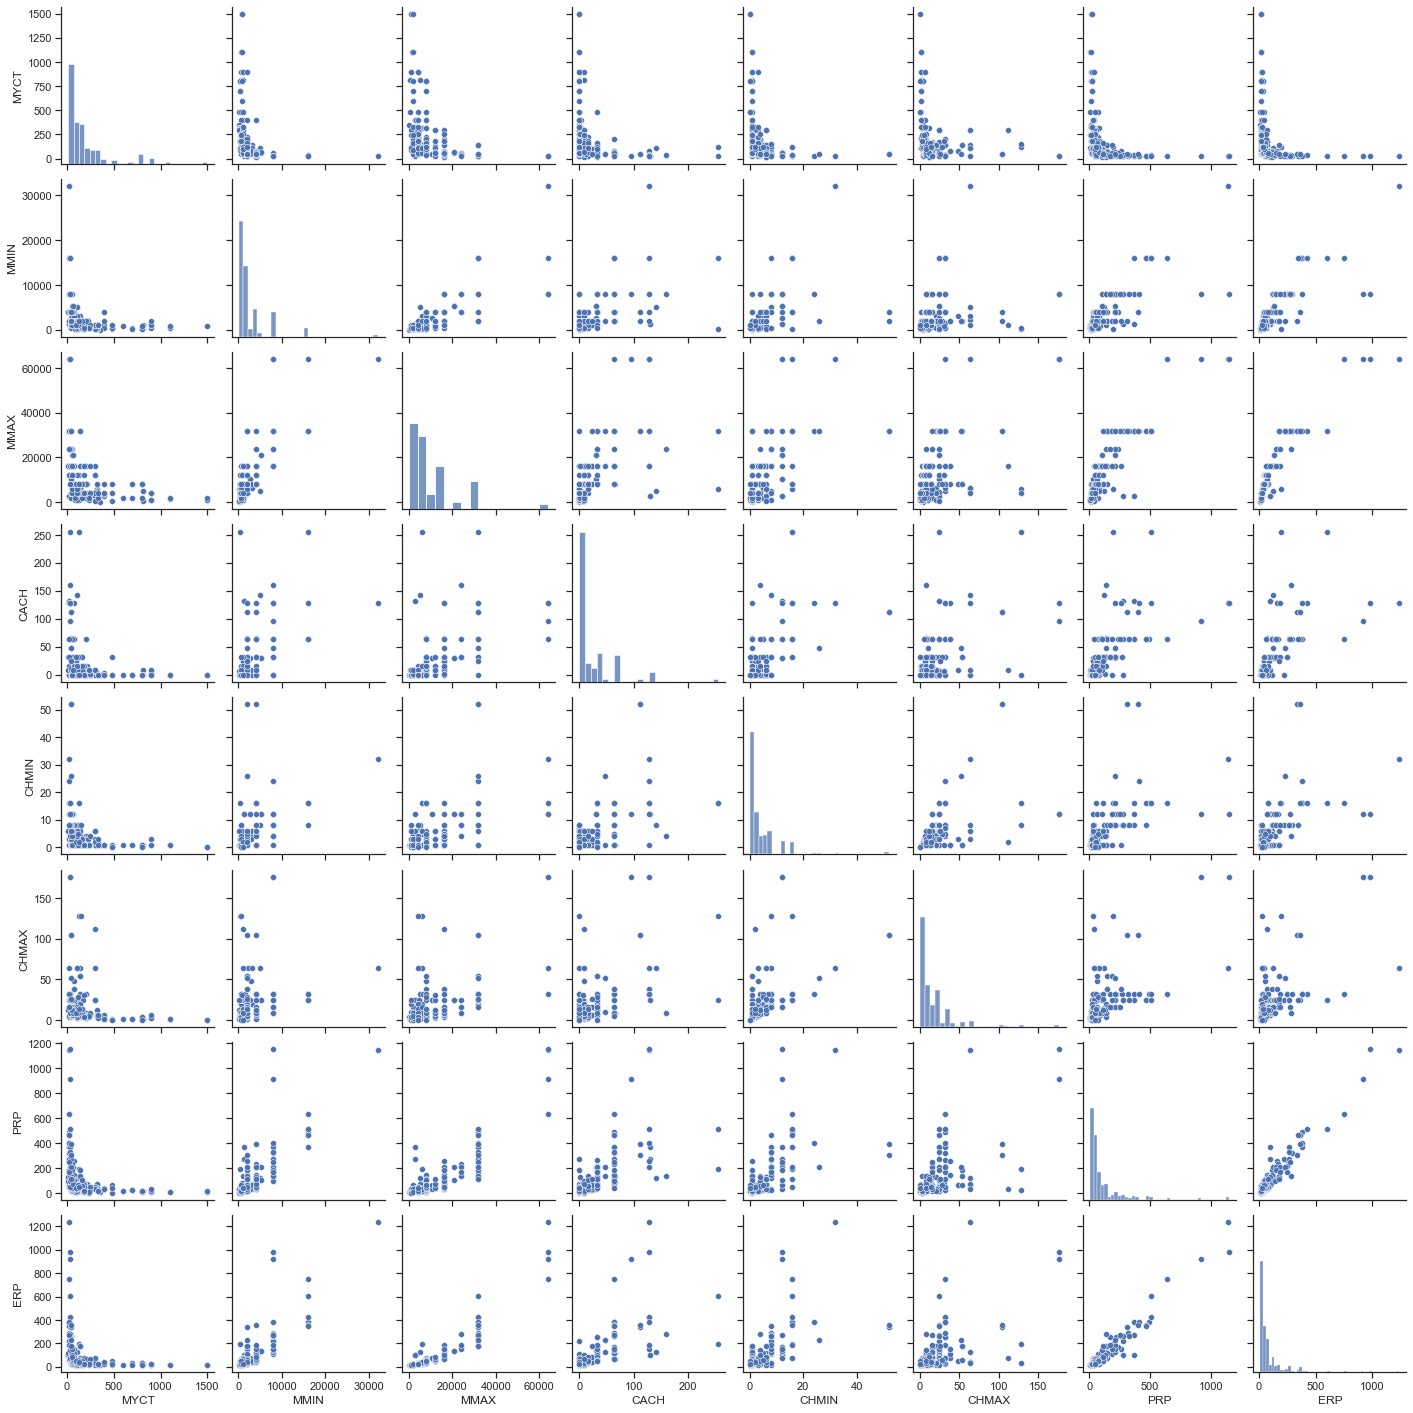

In [45]:
sns.set_theme(style="ticks")
sns.pairplot(df)

In [9]:
import plotly.express as px
fig = px.parallel_coordinates(df,dimensions=['CHMAX', 'MMIN', 'MMAX',
                                          'CACH'],
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

In [ ]:
CONCLUSIONS:
** IBM has been largest producer of Hardware
** Machine cycle time heavily affects the specifications like maximum memory and cache Size
** Most of the machines effective performance does not deviate from the predicted values
** Machine cycle time is directly proportional to the performance that is predicted and effective